In [1]:
import numpy as np
np.random.seed(123)

import pandas as pd
import sys
import os
import configparser
from collections import Counter
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../Module'))
import preprocessing
#import evaluation
#import visualize

config = configparser.ConfigParser()
config.read('../config.ini')
vg_json = config['PATHS']['vg-json']
vg_json_export = config['PATHS']['json-export']
input_dir = vg_json_export + 'feature_arrays/'
input_dir_raw = vg_json_export + 'raw_feature_arrays/'

In [2]:
all_objects = pd.read_csv(vg_json_export+"extracted_data/all_objects.csv", index_col=0)
train_objects = pd.read_csv(vg_json_export+"extracted_data/train_df.csv", index_col=0)

/home/simeon/Masterarbeit/VirtualEnvs/ma-venv/lib/python3.5/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1030919 Einträge
887874 Objekte
25933 Objektklassen
Farben:

color
black     184768
blue      109425
brown      90268
gray       31552
green     108853
orange     28258
pink       18552
purple      9751
red       101778
white     290356
yellow     57358
dtype: int64


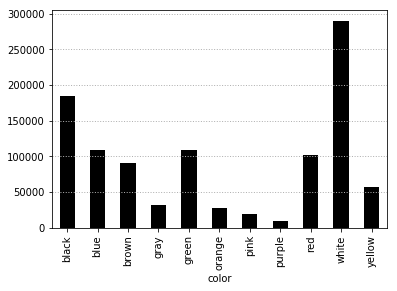

In [3]:
print (len(all_objects), 'Einträge')
print (len(all_objects.groupby('object_id').size()), 'Objekte')
print (len(all_objects.groupby('object_name').size()), 'Objektklassen')

print ('Farben:\n')
print(all_objects.groupby('color').size())
all_objects.groupby('color').size().sort_index().plot.bar(cmap='gray')
plt.gca().yaxis.grid(linestyle=':', linewidth=1)
# als png speichern
plt.savefig(vg_json_export+'images/'+'color_distribution_complete_data.png',bbox_inches="tight")
plt.show()

In [4]:
color_count = all_objects.groupby('color').size().sort_index()
color_count['alle Farben'] = color_count.sum()
print (color_count.to_latex())

\begin{tabular}{lr}
\toprule
{} &        0 \\
color       &          \\
\midrule
black       &   184768 \\
blue        &   109425 \\
brown       &    90268 \\
gray        &    31552 \\
green       &   108853 \\
orange      &    28258 \\
pink        &    18552 \\
purple      &     9751 \\
red         &   101778 \\
white       &   290356 \\
yellow      &    57358 \\
alle Farben &  1030919 \\
\bottomrule
\end{tabular}



799254 Einträge
698436 Objekte
791 Objektklassen
Farben:

color
black     137987
blue       93520
brown      65322
gray       24169
green      79082
orange     21464
pink       14783
purple      8059
red        79891
white     229588
yellow     45389
dtype: int64


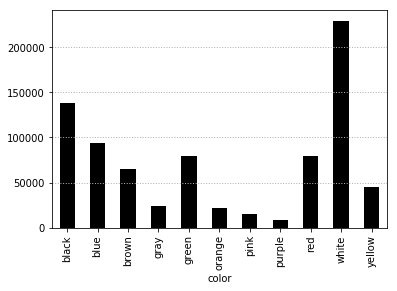

In [10]:
data = np.load(input_dir+'type_to_color_filtered.npz')
all_x = np.append(
        np.append(data['train_x'], data['test_x'], axis=0),
        data['dev_x'],
        axis=0
    )

filtered_ids = all_x[:,0]

object_categories = all_objects.loc[filtered_ids].groupby('object_name').size().keys()
filtered_all_objects = all_objects.loc[all_objects['object_name'].isin(object_categories)]

print (len(filtered_all_objects), 'Einträge')
print (len(filtered_all_objects.groupby('object_id').size()), 'Objekte')
print (len(filtered_all_objects.groupby('object_name').size()), 'Objektklassen')

print ('Farben:\n')
print(filtered_all_objects.groupby('color').size())
filtered_all_objects.groupby('color').size().sort_index().plot.bar(cmap='gray')
plt.gca().yaxis.grid(linestyle=':', linewidth=1)
# als png speichern
plt.savefig(vg_json_export+'images/'+'color_distribution_filtered_data.png',bbox_inches="tight")
plt.show()

In [6]:
color_count_filtered = filtered_all_objects.groupby('color').size().sort_index()
color_count_filtered['alle Farben'] = color_count_filtered.sum()
print (color_count_filtered.to_latex())

\begin{tabular}{lr}
\toprule
{} &       0 \\
color       &         \\
\midrule
black       &  137987 \\
blue        &   93520 \\
brown       &   65322 \\
gray        &   24169 \\
green       &   79082 \\
orange      &   21464 \\
pink        &   14783 \\
purple      &    8059 \\
red         &   79891 \\
white       &  229588 \\
yellow      &   45389 \\
alle Farben &  799254 \\
\bottomrule
\end{tabular}



In [19]:
filtered_all_objects.groupby('color').size().sum()

799254

In [8]:
train_objects.loc[train_objects.object_name.isin(object_categories)].groupby('color').size()

color
black      96381
blue       65516
brown      45672
gray       16879
green      55342
orange     14982
pink       10390
purple      5595
red        55835
white     160929
yellow     31739
dtype: int64

In [9]:
data = np.load(input_dir+'type_to_color_resampled.npz')
counts = Counter(data['train_x'][:,1:].argmax(axis=1))

In [17]:
filtered_all_objects.groupby('object_name').size().mean()

1010.4348925410873